<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

<h4> Integrantes: </h4>

* Lopez Mario
* Foco Denis
* Tarletta Juan

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import scipy.stats as stats
from IPython.display import display, Markdown

### 1. Estadísticos descriptivos

In [2]:
dataset = pd.read_csv('hfi_cc_2018.csv')
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

print(type(dataset[important_cols]))
#data_reduce = dataset[0:4][important_cols[0:6]]
#data_reduce = data_reduce[:]
#print (np.shape(data_reduce))
#print(data_reduce)
#data_reduce.count()

#De la función "describe" localizamos los valores mínimos y máximos(filas), para todas las variables numéricas(columnas)
min_max = dataset[important_cols].describe().loc[['min','max'],:]

mini = min_max.loc['min']
maxi = min_max.loc['max']

#Obtenemos el rango
rango = maxi - mini

#Convertimos la "Serie" del rango en "DataFrame", y agregamos la columna Rango
rango = rango.to_frame(name='Rango')

#Aplicamos la función lambda para establecer los valores con dos decimales de coma flotante.
rango = rango.applymap(lambda x: float("%.2f" %x))
rango


<class 'pandas.core.frame.DataFrame'>


,Rango
year,8.00
pf_identity_legal,10.00
pf_identity_parental_marriage,10.00
pf_identity_parental_divorce,10.00
pf_identity_parental,10.00
pf_identity_sex_male,10.00
pf_identity_sex_female,10.00
pf_identity_sex,10.00
pf_identity_divorce,10.00
pf_identity,10.00


In [3]:
#Filtramos el dataset por región y localizamos las columnas correspondientes
rest_world = dataset[dataset['region']!='Latin America & the Caribbean'].loc[:,['pf_identity','hf_score']].dropna()
latin = dataset[dataset['region']=='Latin America & the Caribbean'].loc[:,['pf_identity','hf_score']].dropna()

#A continuación obtenemos las estadísticas de media, mediana y desviación estándar en cada región para cada variable.
print("Latam/Caribe \n",latin.describe().loc[["mean",'50%','std'],:],"\n")
print("Resto del Mundo \n",rest_world.describe().loc[["mean",'50%','std'],:])


Latam/Caribe 
       pf_identity  hf_score
mean     8.765086  7.047982
50%     10.000000  7.028045
std      1.711732  0.608904 

Resto del Mundo 
       pf_identity  hf_score
mean     7.044503  6.982403
50%      8.333333  6.867191
std      3.303771  1.090861


No tiene sentido calcular la Moda ya que en **hf_identity** la Moda es la inexistencia de datos (NaN's), aunque si sacamos los NaN's, la moda sería de valor 10, mientras que en **hf_score** la Moda son multiples valores.

In [4]:
print(latin.mode(),rest_world.mode())

     pf_identity  hf_score
0           10.0  4.200724
1            NaN  4.241750
2            NaN  4.573730
3            NaN  5.013857
4            NaN  5.156619
5            NaN  5.225650
6            NaN  5.257879
7            NaN  5.283514
8            NaN  5.332458
9            NaN  6.207145
10           NaN  6.207989
11           NaN  6.227150
12           NaN  6.445000
13           NaN  6.469848
14           NaN  6.502548
15           NaN  6.518669
16           NaN  6.523791
17           NaN  6.524266
18           NaN  6.542688
19           NaN  6.557821
20           NaN  6.569287
21           NaN  6.570411
22           NaN  6.570844
23           NaN  6.577630
24           NaN  6.615917
25           NaN  6.640826
26           NaN  6.649969
27           NaN  6.669027
28           NaN  6.672614
29           NaN  6.674009
..           ...       ...
202          NaN  7.682004
203          NaN  7.683067
204          NaN  7.728071
205          NaN  7.736980
206          NaN  7.745258
2

##### 4. ¿Cómo pueden sanearse los valores faltantes?

De los vaores faltantes hay que tener en cuenta si su distribución es aleatoria o no, ya que si no lo son, éstos pueden disminuir la representatividad de la muestra (Ocasión similar tendríamos si eliminaramos los outliers del punto 5).
La forma de sanear los datos faltantes puede ser: 
1. Mediante la eliminación de los mismos ( Preferentemente si los faltantes son aleatorios).
2. Mediante la sustitución de esos datos( En estas sustituciones se pueden determinar los valores a través de Media, Moda, Regresión, Knn, entre otras)

##### 5 ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

Para detectar los Outliers, podemos hacer una revisión tanto visual como analítica, la primera podemos realizarla fundamentalmente a través del gráfico de caja (boxplot), aunque también podemos valernos del grafico de distribución (distplot).
Para la revisión analítica existen diversos métodos como el "Criterio de Peirce", "Criterio de Chauvenet", "Test de Grubbs". Nosotros en este caso nos basaremos en el boxplot, por lo que utilizaremos el "Test de Tukey", el cual delimita los datos de un dataset $X$ tal que: $X <= Q3+(1.5*IQR) \wedge X >= Q1 -(1.5 * IQR)$

Graficamos **hf_score**:

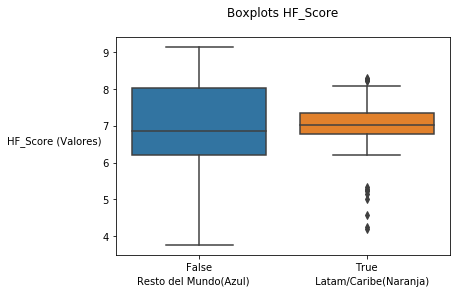

In [5]:
score_box_grap =seaborn.boxplot(x=dataset['region']=='Latin America & the Caribbean', y=dataset['hf_score'], orient='v')
score_box_grap.set_title("Boxplots HF_Score\n")
score_box_grap.set_ylabel('HF_Score (Valores)                            ', rotation=360)
score_box_grap.set_xlabel('Resto del Mundo(Azul)        '+'             Latam/Caribe(Naranja)')
plt.show()

En **hf_score** podemos observar visualmente outliers en el Boxplot de *Latam/Caribe* para valores aproximadamente superiores a 8 e inferiores a 6, a continuación visualizaremos su distribución y los analizaremos analíticamente para aumentar la precisión.

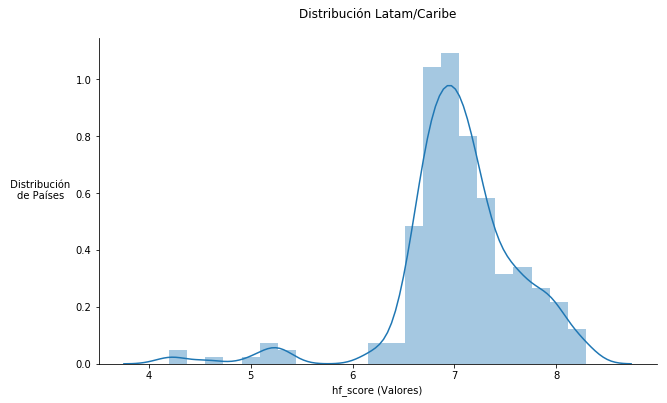

In [6]:
#Graficamos el dataset filtrado por región y por hf_score, evitando los valores NaN's 
plt.figure(figsize=(10,6))
score_latin_graph = seaborn.distplot(dataset[dataset['region']=='Latin America & the Caribbean'].loc[:,['hf_score']].dropna())
score_latin_graph.set_title('Distribución Latam/Caribe\n')
score_latin_graph.set_xlabel('hf_score (Valores)')
score_latin_graph.set_ylabel('\n Distribución                     \nde Países                    ', rotation=360)
seaborn.despine()
plt.show()

In [7]:
#Establecemos los límites de outliers analíticamente

#Primer Cuartil o percentil 25th Q1=25% de los datos.
q1= latin.describe()[4:5]['hf_score'].values #Utilizamos el valor del elemento con la función ".values"

#Tercer Cuartil o percentil 75th Q3=75% de los datos.
q3= latin.describe()[6:7]['hf_score'].values #Utilizamos el valor del elemento con la función ".values"

#Intercuartil (Q3-Q1)
iqr = q3-q1

#Límites inferior y superior para la busqueda de outliers
lower_limit = float(q1 -(1.5 * iqr)) #Convertimos el elemento array en float para utilizar el valor numérico luego
upper_limit = float(q3 +(1.5 * iqr)) #Convertimos el elemento array en float para utilizar el valor numérico luego

In [8]:
#Aplicamos la revisión analítica

#¿Cuántos son los outliers menores y mayores al límite?
low_latin_cant = latin[(latin['hf_score'] < lower_limit)].shape[0] #Nos devuelve el número de filas(países) que cumplen la condición
high_latin_cant = latin[(latin['hf_score'] > upper_limit)].shape[0] 

#Cantidad total de países de Latam/Caribe
latin_total = latin['hf_score'].shape[0]
print('Cantidad de outliers menores: ',low_latin_cant,'\nCantidad de outliers mayores: ',high_latin_cant)
print('\nCantidad total de datos Latam/Caribe:',latin_total,'\n')

#Identificamos sus índices
low_latin_indexs = latin[(latin['hf_score'] < lower_limit)].index.tolist()
high_latin_indexs = latin[(latin['hf_score'] > upper_limit)].index.tolist()

#¿A qué países corresponden los outliers?
low_latin = dataset['countries'][low_latin_indexs]
high_latin = dataset['countries'][high_latin_indexs]

print('¿A qué países corresponden los outliers menores?'+'\n'+'\r'+str(low_latin))
print('\n¿A qué países corresponden los outliers mayores?'+'\n'+'\r'+str(high_latin))

Cantidad de outliers menores:  9 
Cantidad de outliers mayores:  5

Cantidad total de datos Latam/Caribe: 232 

¿A qué países corresponden los outliers menores?
157     Venezuela
319     Venezuela
481     Venezuela
643     Venezuela
805     Venezuela
967     Venezuela
1129    Venezuela
1291    Venezuela
1453    Venezuela
Name: countries, dtype: object

¿A qué países corresponden los outliers mayores?
679     Chile
841     Chile
1003    Chile
1165    Chile
1327    Chile
Name: countries, dtype: object


El particular resultado nos indica que hay valores para 2 países que son atípicos al nivel de la región, ambos por limites opuestos. No parece ser conveniente remover los outliers ya que pertenecen a países importantes de la región.
Sin embargo a continuación graficaremos la distribución sin los outliers a modo de analisis.

Cantidad de outliers removidos:  14

Cantitad total sin sacar outliers: 232

Cantitad total sacando outliers: 218


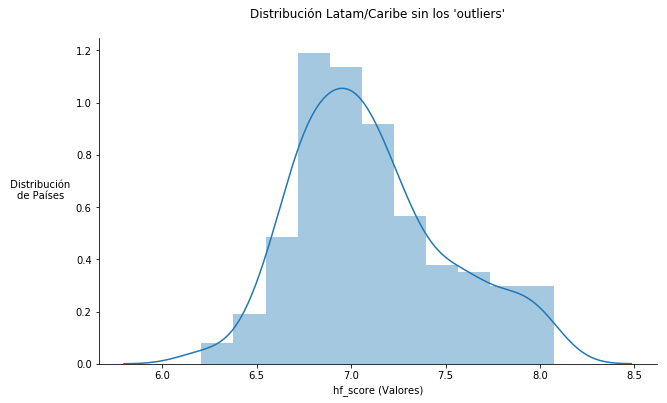

In [9]:
#Seleccionamos el dataset
datos_latin = dataset[dataset['region']=='Latin America & the Caribbean'].loc[:,['hf_score']].dropna()

#Armamos una lista de todos con los índices de todos los outliers
latin_outliers_index = high_latin_indexs + low_latin_indexs
print("Cantidad de outliers removidos: ",len(latin_outliers_index))

#Otra lista con los índices totales
latin_list_index = latin['hf_score'].index.tolist()
print("\nCantitad total sin sacar outliers:",len(latin_list_index))

#Seleccionamos la lista de índices sin outliers
latin_less_outliers_index = set(latin_list_index) - (set(latin_outliers_index)) #Utilizamos la función set con la operación "-", para eliminar los índicies repetidos
latin_less_outliers_index = list(latin_less_outliers_index) #Transformamos en lista para poderla utilizar como índice
latin_less_outliers_index = sorted(latin_less_outliers_index) #La ordenamos
print("\nCantitad total sacando outliers:",len(latin_less_outliers_index))


less_outliers_latin_data = datos_latin['hf_score'].reindex(latin_less_outliers_index)


#Graficamos el dataset hf_score de Latam/Caribe sin los outliers
plt.figure(figsize=(10,6))
score_latin_graph = seaborn.distplot(less_outliers_latin_data)
score_latin_graph.set_title("Distribución Latam/Caribe sin los 'outliers'\n")
score_latin_graph.set_xlabel('hf_score (Valores)')
score_latin_graph.set_ylabel('\n Distribución                     \nde Países                    ', rotation=360)
seaborn.despine()
plt.show()

Luego de ver el grafico, consideramos conveniente no realizar la eliminación de outliers.


A continuación graficaremos en simultáneo la distribución de países en **hf_score** tanto para Latam/Caribe como para el Resto_Del_Mundo.

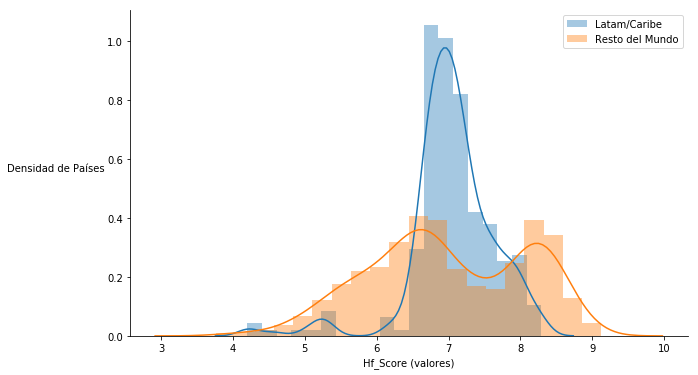

In [10]:
#Graficamos las distribuciones Latam/Caribe y Resto_Del_Mundo

#Cargamos los datos hf_score a una nueva variable para que sea más cómodo utilizarlos
score_latin_graph = dataset[dataset['region']=='Latin America & the Caribbean'].loc[:,['hf_score']].dropna()
score_rest_world_graph = dataset[dataset['region']!='Latin America & the Caribbean'].loc[:,['hf_score']].dropna()

plt.figure(figsize=(10,6))

seaborn.distplot(score_latin_graph, bins=20, label='Latam/Caribe')
seaborn.distplot(score_rest_world_graph, bins=20, label='Resto del Mundo')

plt.xlabel("Hf_Score (valores)")
plt.ylabel('\nDensidad de Países                              ',rotation=360)
plt.legend()
seaborn.despine()
plt.show()

Es muy evidente al observar el gráfico que el "Resto del Mundo" por más de que no posea outliers, tiene la particularidad de contar con dos grandes distribuciones bien diferenciadas, que no resultaban visibles en el boxplot, pero que son visibles en el gráfico de distribución (distplot).

A continuación las observaremos en más detalle.

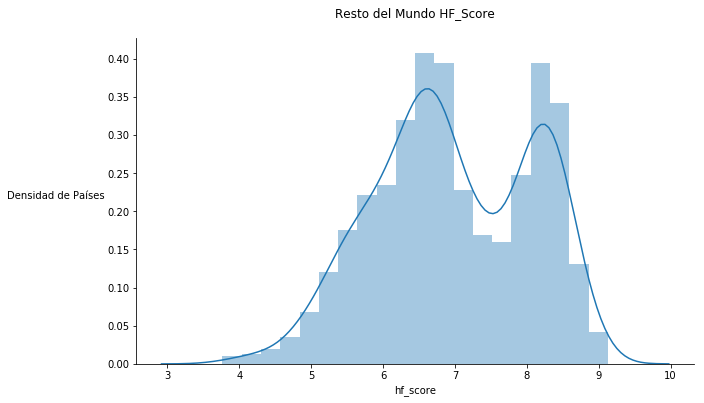

In [11]:
plt.figure(figsize=(10,6))
seaborn.distplot(score_rest_world_graph, bins=20, label='Resto del Mundo')
plt.title('Resto del Mundo HF_Score\n')
plt.xlabel('hf_score')
plt.ylabel('\nDensidad de Países                              ',rotation=360)
seaborn.despine()
plt.show()

Establecemos el punto de corte arbitrariamente en 7.5, a continuación analizamos y graficamos.

Region predominante en la distribución menor:  Sub-Saharan Africa
Region predominante en la distribución mayor:  Western Europe

Cantidad de muestras de la moda menor: 337
Cantidad de muestras de la moda mayor: 162

Cantidad de muestras totales en la distribución menor: 739
Cantidad de muestras totales en la distribución mayor: 407


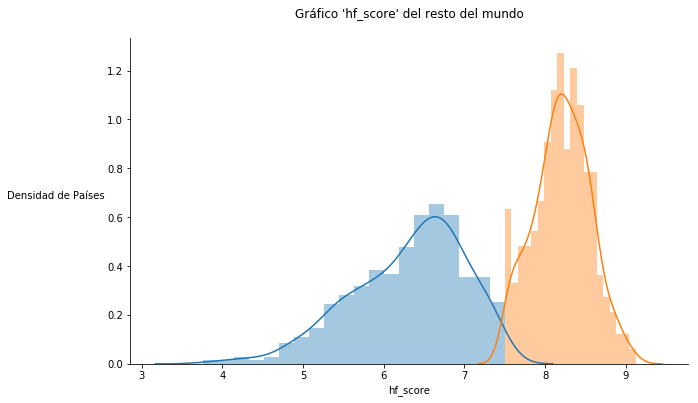

In [12]:
#Seleccionamos la muestra
score_rest_world = dataset[dataset['region']!='Latin America & the Caribbean'].loc[:,['hf_score']].dropna()

#Contamos la cantidad de muestras menores y mayores a 7.5
low_cant = score_rest_world[(score_rest_world['hf_score'] < 7.5)].shape[0]
high_cant = score_rest_world[(score_rest_world['hf_score'] > 7.5)].shape[0]

#Identificamos sus índices
low_rest_world_indexs = score_rest_world[(score_rest_world['hf_score'] < 7.5)].index.tolist()
low_rest_world = dataset['region'][low_rest_world_indexs]

high_rest_world_indexs = score_rest_world[(score_rest_world['hf_score'] > 7.5)].index.tolist()
high_rest_world = dataset['region'][high_rest_world_indexs]


#¿Qué región predomina en cada distribución? (Utilizamos la moda para ello)
low_rest_mode = low_rest_world.mode()[0] #Utilizamos [0] para obtener el valor/nombre str "limpio"
high_rest_mode = high_rest_world.mode()[0]

print ("Region predominante en la distribución menor: ",low_rest_mode)
print ("Region predominante en la distribución mayor: ",high_rest_mode)

#¿Con cuántas muestras predomina cada una?
low_cant = low_rest_world[low_rest_world==low_rest_mode].shape[0]
high_cant = high_rest_world[high_rest_world==high_rest_mode].shape[0]

print('\nCantidad de muestras de la moda menor:',low_cant)
print('Cantidad de muestras de la moda mayor:',high_cant)

#Cantidad totales
print('\nCantidad de muestras totales en la distribución menor:',low_rest_world.shape[0])
print('Cantidad de muestras totales en la distribución mayor:',high_rest_world.shape[0])

#Seleccionamos el hf_score para graficar
plt.figure(figsize=(10,6))
score_low_rest_graph = seaborn.distplot(dataset['hf_score'][low_rest_world_indexs], bins=20, label="Distribución menor")
score_high_rest_graph = seaborn.distplot(dataset['hf_score'][high_rest_world_indexs],bins=20, label="Distribución mayor")

plt.ylabel('\nDensidad de Países                              ',rotation=360)
plt.title("Gráfico 'hf_score' del resto del mundo\n")

seaborn.despine()
plt.show()

Graficamos **pf_identity**:

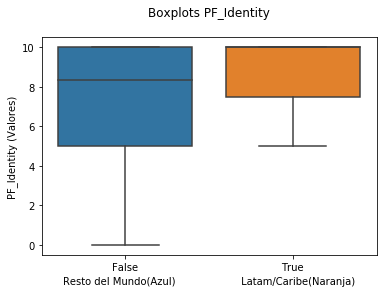

In [13]:
identity_box_grap = seaborn.boxplot(x=dataset['region']=='Latin America & the Caribbean', y=dataset['pf_identity'], orient='v', fliersize=5)

identity_box_grap.set_title("Boxplots PF_Identity\n")
identity_box_grap.set_ylabel('PF_Identity (Valores)')
identity_box_grap.set_xlabel('Resto del Mundo(Azul)        '+'             Latam/Caribe(Naranja)')
plt.show()

No visualizamos outliers en el boxplot de **pf_identity**

### 2. Agregación de datos

##### 1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.

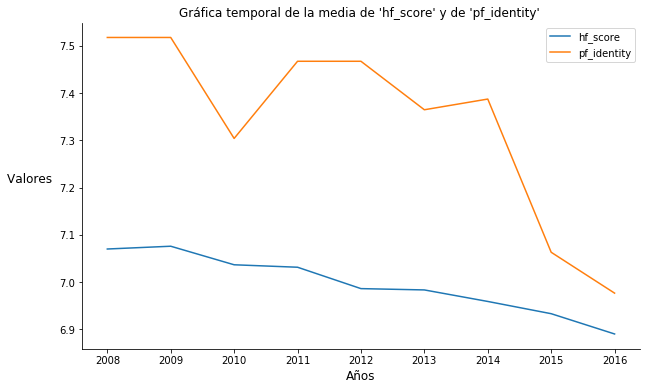

In [14]:
#Realizamos un Gráfico "manual" de la media de hf_score y pf_identity a través de los años

list_mean =[]
pd.Series(list_mean)
#Realizamos un ciclo para obtener las medias de cada año, desde el año menor 2008 hasta el año mayor 2016
for i in range(dataset.year.min(),dataset.year.max()+1):
    
    #Almacenamos los valores de la media de hf_score y pf_identity en el año=i
    separe = dataset[dataset['year']==i].loc[:,['hf_score','pf_identity']].mean().values
    
    #Almacenamos el año=i, el valor de hf_score y el valor de pf_identity
    list_mean += [[i,separe[0],separe[1]]]

#A partir del list_mean generamos un dataframe con las etiquetas correspondientes
list_mean = pd.DataFrame(list_mean, columns = ['year','hf_score', 'pf_identity'])

#Graficamos
plt.figure(figsize=(10,6))
seaborn.lineplot(data=list_mean, x='year', y='hf_score', label='hf_score')
seaborn.lineplot(data=list_mean, x='year' ,y='pf_identity', label='pf_identity')
plt.title("Gráfica temporal de la media de 'hf_score' y de 'pf_identity' ")
plt.xlabel("Años", size=12)
plt.ylabel('\nValores             ',size=12,rotation=360)
seaborn.despine()
plt.show()

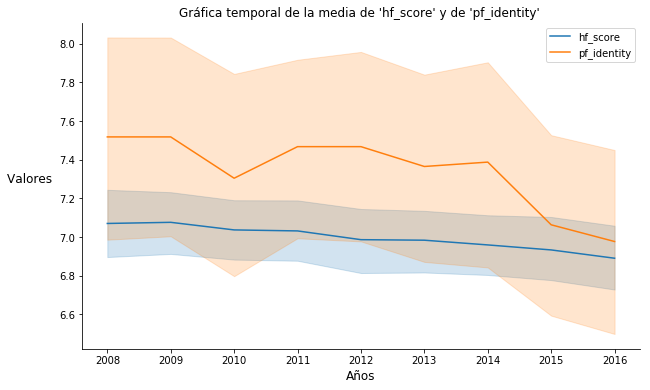

In [15]:
#Al realizar el gráfico de hf_score y pf_identity de forma automática, se nos resalta en la línea central ambas medias.

#Seleccionamos las columnas a utilizar en el eje y
colu =['hf_score','pf_identity']

#Eliminamos los NaN's sacando la columna year, evitando problemas al graficar
dataset0 = dataset[colu].dropna()

plt.figure(figsize=(10,6))

#Seleccionamos el eje x=años, perteneciente al dataset original.
seaborn.lineplot(data=dataset0[colu], x=dataset['year'],y='hf_score', label='hf_score') 

seaborn.lineplot(data=dataset0[colu], x=dataset['year'],y='pf_identity', label='pf_identity')

plt.xlabel("Años",size=12)
plt.ylabel('\nValores             ',size=12,rotation=360)
plt.title("Gráfica temporal de la media de 'hf_score' y de 'pf_identity' ")
seaborn.despine()
plt.show()

##### 2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

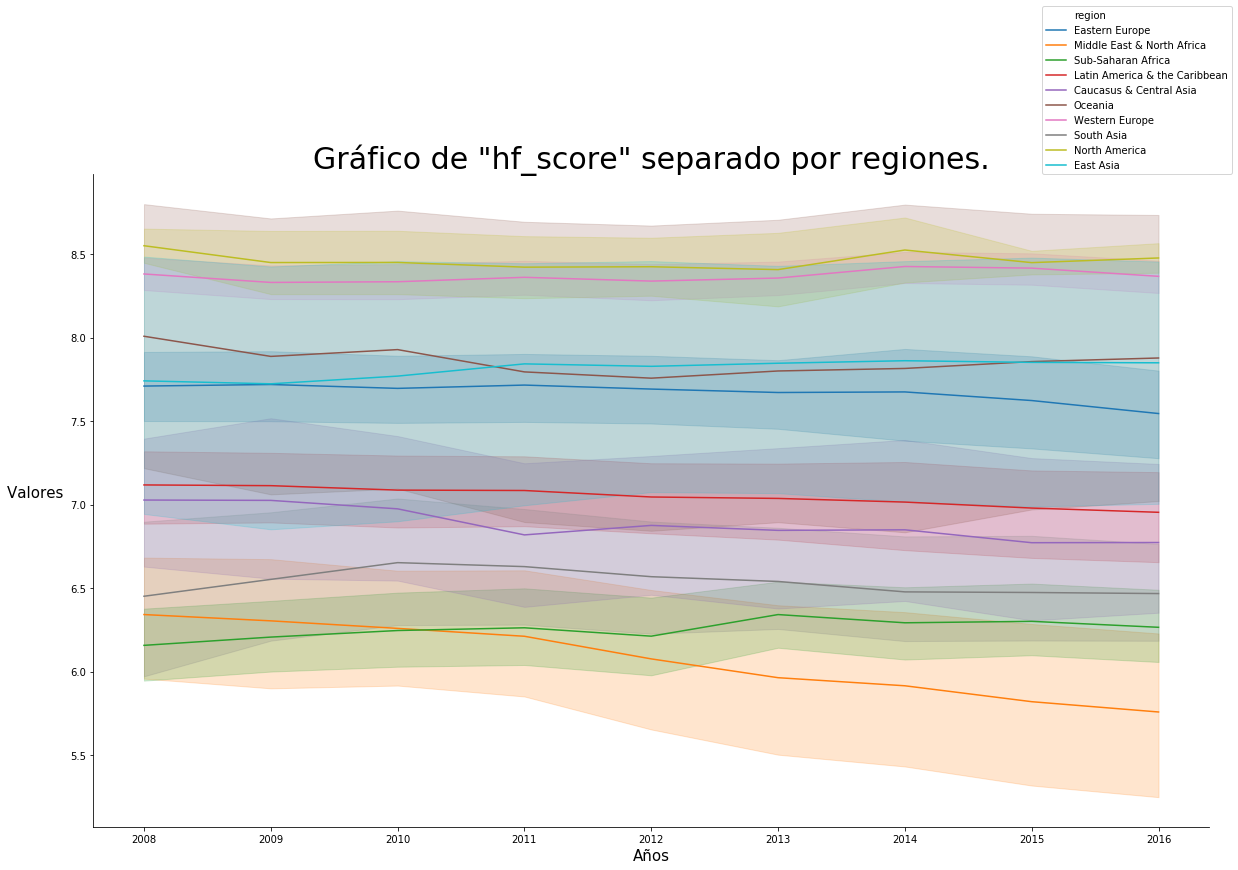

In [16]:
#Realizamos el gráfico de hf_score por regiones


#Seleccionamos las columnas a utilizar en el eje y
colu =['hf_score','pf_identity']

#Eliminamos los NaN's sacando la columna year, evitando problemas al graficar
dataset0 = dataset[colu].dropna()

plt.figure(figsize=(20,12))

#Al grafico anterior le sumamos el "hue" sobre el data set original para separar por Region.
seaborn.lineplot(data=dataset0[colu], x=dataset['year'], y='hf_score', hue=dataset['region']) 

plt.xlabel("Años",size=15)
plt.ylabel('\nValores             ',size=15,rotation=360)
plt.title('Gráfico de "hf_score" separado por regiones.', size=30)
plt.legend(bbox_to_anchor=(1.02, 1.0), loc=4, borderaxespad=0.)

seaborn.despine()
plt.show()

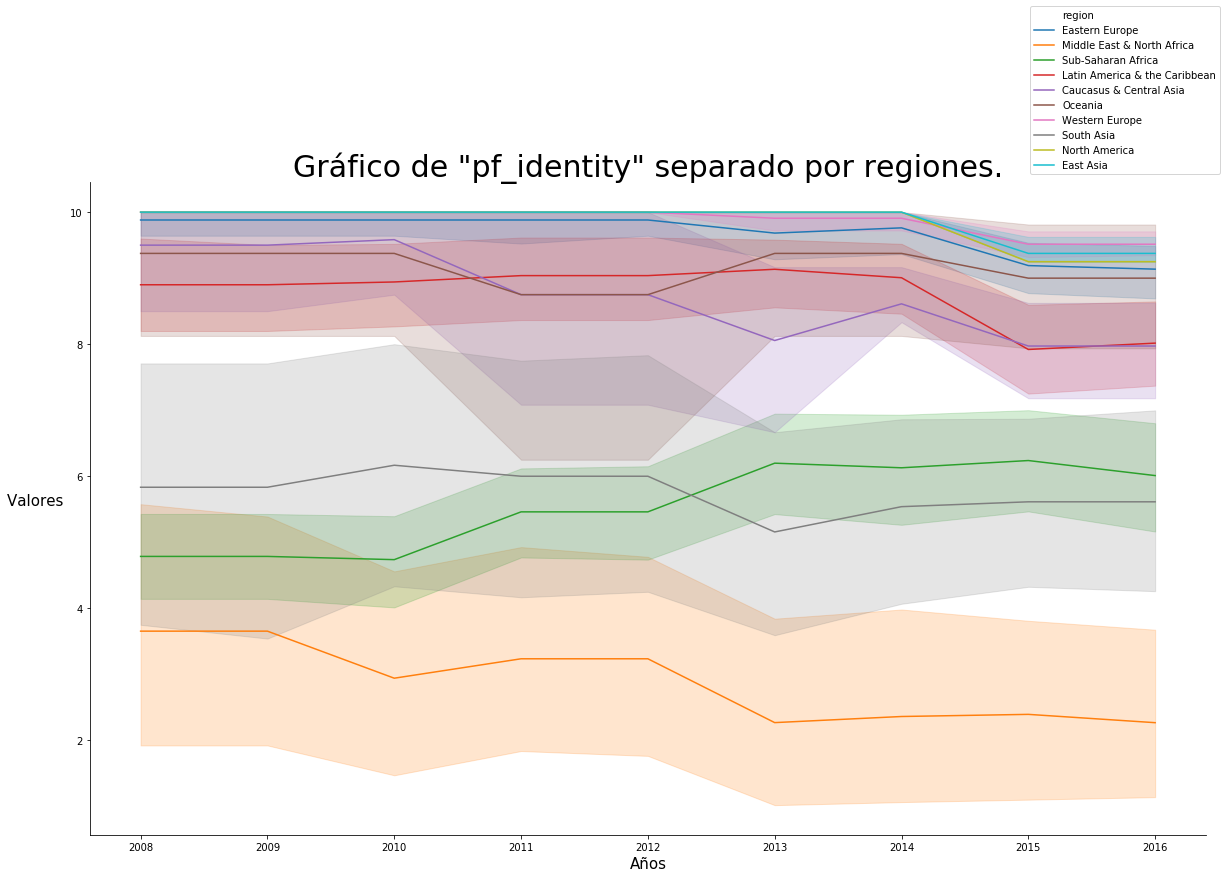

In [17]:
#Realizamos el gráfico de las medias de pf_identity divididas por regiones.

plt.figure(figsize=(20,12))

seaborn.lineplot(data=dataset0[colu], x=dataset['year'],y='pf_identity', hue=dataset['region'])

plt.xlabel("Años",size=15)
plt.ylabel('\nValores             ',size=15,rotation=360)
plt.title('Gráfico de "pf_identity" separado por regiones.', size=30)
plt.legend(bbox_to_anchor=(1.02, 1.0), loc=4, borderaxespad=.8)

seaborn.despine()
plt.show()

Evidenciamos que al graficar las medias por regiones, la tendencia al descenso desde 2008 a 2016 es general en ambas variables, exceptuando en **"pf_identity"** a la región de **"Sub-Saharan Africa"**, y en **"hf_score"** a **East Asia**, las cuales tienen un crecimiento en ese período.

##### 3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?


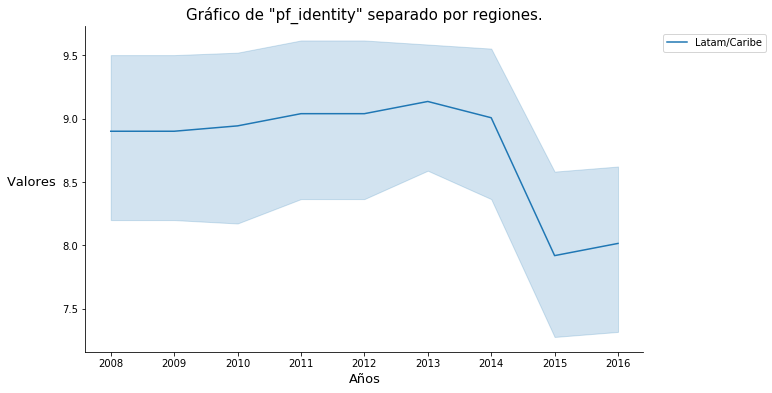

In [18]:
#Graficamos los países de la región Latam/Caribe de la variable pf_identity 

#Seleccionamos la zona Latam/caribe
latam_caribe = dataset[dataset['region']=='Latin America & the Caribbean'].loc[:,['year','countries','pf_identity']].dropna()

plt.figure(figsize=(10,6))

seaborn.lineplot(data=latam_caribe, x=dataset['year'], y='pf_identity', label='Latam/Caribe') 

plt.xlabel("Años",size=13)
plt.ylabel('\nValores             ',size=13,rotation=360)
plt.title('Gráfico de "pf_identity" separado por regiones.', size=15)
plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=.8)

seaborn.despine()
plt.show()

Observamos en la tendencia un abrupto cambio descendente en la región, a partir del año 2014.

La forma de seleccionar los países que ponderan esa tendencia, es realizando la diferencia entre los valores del año 2015 con los valores del 2014. Los países en los que esa diferencia sea negativa, van a ser los países que ponderan la baja.
A continuación los analizaremos.

Cantidad de datos/países que bajan la tendencia de la región:  13

Datos/países que bajan la tendencia de la región:

 ['Brazil' 'Chile' 'Costa Rica' 'Dominican Rep.' 'El Salvador' 'Guatemala'
 'Haiti' 'Honduras' 'Jamaica' 'Nicaragua' 'Panama' 'Paraguay' 'Venezuela']


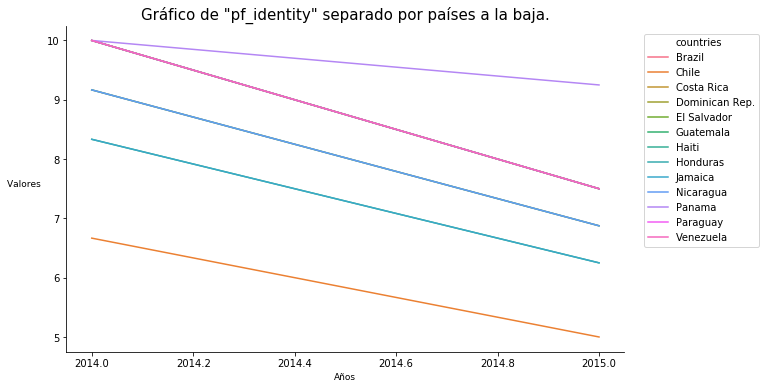

In [19]:
#Seleccionamos los datos de la región en el intervalo decreciente 2014-2015
datos_latam = dataset[dataset['region']=='Latin America & the Caribbean'].loc[:,['year','countries','pf_identity']].dropna()

#datos_latam = datos_latam[(datos_latam['year']>=2014)]
datos_latam = datos_latam[(datos_latam['year']>=2014) & (datos_latam['year']<=2015)]

#Alteramos el dataframe, para agregar una columna con la diferencia entre el valor del 2015-2014 de df_identity

#Ordenamos los datos por países para que coincida la diferencia
datos_latam = datos_latam.sort_values('countries')
#Separamos por año el pf_identity
datos_latam_14 = datos_latam[datos_latam['year']==2014].loc[:,['pf_identity']]
datos_latam_15 = datos_latam[datos_latam['year']==2015].loc[:,['pf_identity']]

#Unimos esos datos en un mismo dataframe
datos_latam_15['pf_identity2'] = datos_latam_14.values

#Realizamos la diferencia entre los valores pf_identity de los países [valores del 2015 - valores del 2014]
datos_latam_15['pf_diference'] = datos_latam_15['pf_identity'] - datos_latam_15['pf_identity2']


#Obtenemos los indices de los países cuyas diferencias sean menor a cero (los cuales son los que generan la tendencia negativa)
index_low_pais = datos_latam_15[(datos_latam_15['pf_diference'] < 0)].index.tolist()


#¿Cuántos son?
cant_menores_latam = datos_latam.loc[index_low_pais].shape[0]

print("Cantidad de datos/países que bajan la tendencia de la región: ", cant_menores_latam)

#¿Cuales son?
paises_menores = datos_latam.loc[index_low_pais]['countries'].values
print("\nDatos/países que bajan la tendencia de la región:\n\n "+str(paises_menores))

list(paises_menores)

#Creamos una lista de los países que estan a la baja
paises_low=[]
for x in range(0,len(paises_menores)):
    paises_low.append(paises_menores[x])
#Con la función .isin() podemos localizar multiples elementos(filas) de un dataset[columna]... lo usamos para graficar
datos_paises_menores = datos_latam[datos_latam['countries'].isin(paises_low)]


#Graficamos
plt.figure(figsize=(10,6))

seaborn.lineplot(data=datos_paises_menores, x=dataset['year'], y='pf_identity', hue='countries') 

plt.xlabel("Años",size=9)
plt.ylabel('\nValores             ',size=9,rotation=360)
plt.title('Gráfico de "pf_identity" separado por países a la baja.', size=15)
plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=.8)

seaborn.despine()
plt.show()

Aquí observamos en detalle la cantidad de países que eran, y cuales son sus gráficas.

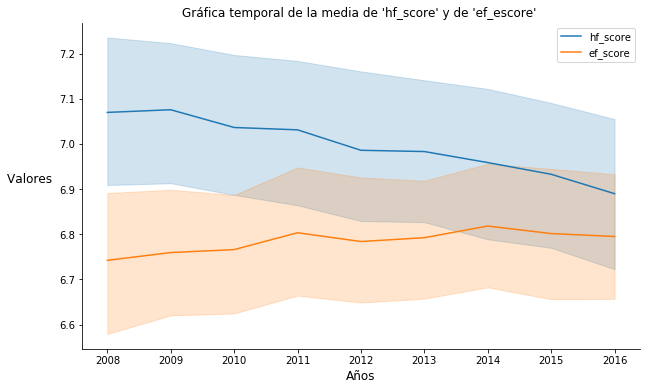

In [20]:
#Al realizar el gráfico de hf_score y pf_identity de forma automática, se nos resalta en la línea central ambas medias.

#Seleccionamos las columnas a utilizar en el eje y
colu =['ef_score','hf_score']

#Eliminamos los NaN's sacando la columna year, evitando problemas al graficar
dataset0 = dataset[colu].dropna()

plt.figure(figsize=(10,6))

#Seleccionamos el eje x=años, perteneciente al dataset original.
seaborn.lineplot(data=dataset0[colu], x=dataset['year'],y='hf_score', label='hf_score') 

seaborn.lineplot(data=dataset0[colu], x=dataset['year'],y='ef_score', label='ef_score')

plt.xlabel("Años",size=12)
plt.ylabel('\nValores             ',size=12,rotation=360)
plt.title("Gráfica temporal de la media de 'hf_score' y de 'ef_escore' ")
seaborn.despine()
plt.show()

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

Lo que podemos plantear en base a este gráfico es que el crecimiento de la "libertad económica", no implica "libertad humana". Desconocemos especificamente la forma de adquisición de datos de este dataset, y lo que sus variables implican, pero en analisis de algunos historiadores el modelo de desarrollo económico "del derrame" predominante durante el final del siglo XX y principios del XXI, implica la relación inversamente proporcional que existe entre minorías-mayorías. Por lo que podemos ver que la exuberante "libertad" en minorías, implicaría la dependencia en el sistema para subsistir que tienen las mayorías.

## 3. Distribuciones
  

1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*.

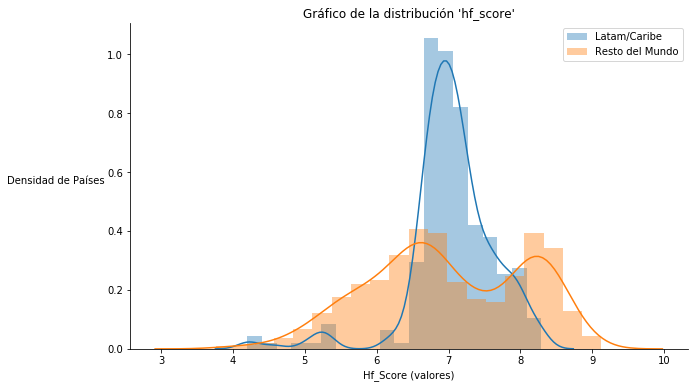

In [62]:
#Graficamos las distribuciones hf_score de Latam/Caribe y Resto_Del_Mundo

#Cargamos los datos hf_score a una nueva variable para que sea más cómodo utilizarlos
score_latin_graph1 = dataset[dataset['region']=='Latin America & the Caribbean'].loc[:,['hf_score']].dropna()
score_rest_world_graph1 = dataset[dataset['region']!='Latin America & the Caribbean'].loc[:,['hf_score']].dropna()

plt.figure(figsize=(10,6))

seaborn.distplot(score_latin_graph1, bins=20, label='Latam/Caribe')
seaborn.distplot(score_rest_world_graph1, bins=20, label='Resto del Mundo')

plt.xlabel("Hf_Score (valores)")
plt.ylabel('\nDensidad de Países                              ',rotation=360)
plt.title("Gráfico de la distribución 'hf_score'")
plt.legend()
seaborn.despine()
plt.show()

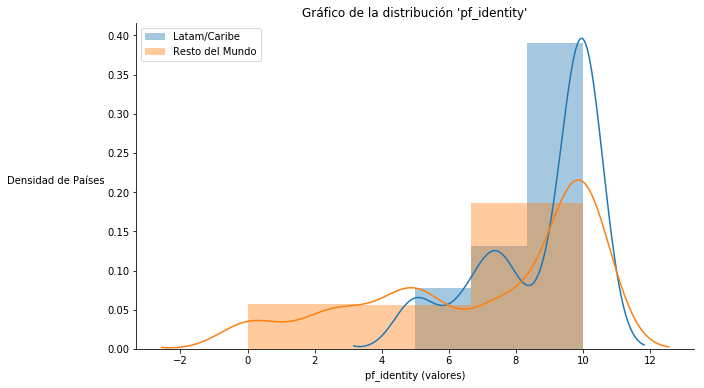

In [63]:
#Graficamos las distribuciones pf_identity de Latam/Caribe y Resto_Del_Mundo

#Cargamos los datos hf_score a una nueva variable para que sea más cómodo utilizarlos
score_latin_graph2 = dataset[dataset['region']=='Latin America & the Caribbean'].loc[:,['pf_identity']].dropna()
score_rest_world_graph2 = dataset[dataset['region']!='Latin America & the Caribbean'].loc[:,['pf_identity']].dropna()

plt.figure(figsize=(10,6))

seaborn.distplot(score_latin_graph2, bins=3, label='Latam/Caribe')
seaborn.distplot(score_rest_world_graph2, bins=3, label='Resto del Mundo')

plt.xlabel("pf_identity (valores)")
plt.ylabel('\nDensidad de Países                              ',rotation=360)
plt.title("Gráfico de la distribución 'pf_identity'")
plt.legend()
seaborn.despine()
plt.show()

**¿Visualmente, a qué tipo de distribución corresponde cada variable?**

Se puede observar claramente que el gráfico de **hf_score** sigue una distribución normal con la particularidad de que la region "Resto del mundo" está compuesta por dos distribuciónes visualmente separadas.

Por otro lado en el gráfico de **pf_identity** no es evidente una distribución normal, sino que se asemeja más a una exponencial.

**¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?**

En el caso de **hf_score** "Resto del mundo" es conveniente realizar una división en los datos, ya que se evidencian 2 distribuciones, como decíamos antes.

Region predominante en la distribución menor:  Sub-Saharan Africa
Region predominante en la distribución mayor:  Western Europe

Cantidad de muestras de la moda menor: 337
Cantidad de muestras de la moda mayor: 162

Cantidad de muestras totales en la distribución menor (Azul): 739
Cantidad de muestras totales en la distribución mayor (Rojo): 407


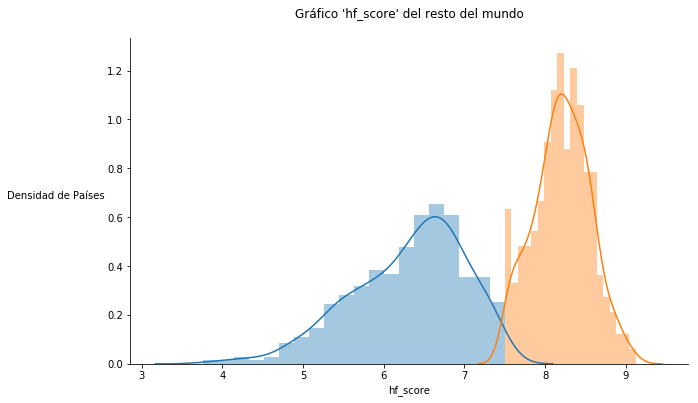

In [60]:
#Seleccionamos la muestra
score_rest_world = dataset[dataset['region']!='Latin America & the Caribbean'].loc[:,['hf_score']].dropna()

#Contamos la cantidad de muestras menores y mayores a 7.5
low_cant = score_rest_world[(score_rest_world['hf_score'] < 7.5)].shape[0]
high_cant = score_rest_world[(score_rest_world['hf_score'] > 7.5)].shape[0]

#Identificamos sus índices
low_rest_world_indexs = score_rest_world[(score_rest_world['hf_score'] < 7.5)].index.tolist()
low_rest_world = dataset['region'][low_rest_world_indexs]

high_rest_world_indexs = score_rest_world[(score_rest_world['hf_score'] > 7.5)].index.tolist()
high_rest_world = dataset['region'][high_rest_world_indexs]


#¿Qué región predomina en cada distribución? (Utilizamos la moda para ello)
low_rest_mode = low_rest_world.mode()[0] #Utilizamos [0] para obtener el valor/nombre str "limpio"
high_rest_mode = high_rest_world.mode()[0]

print ("Region predominante en la distribución menor: ",low_rest_mode)
print ("Region predominante en la distribución mayor: ",high_rest_mode)

#¿Con cuántas muestras predomina cada una?
low_cant = low_rest_world[low_rest_world==low_rest_mode].shape[0]
high_cant = high_rest_world[high_rest_world==high_rest_mode].shape[0]

print('\nCantidad de muestras de la moda menor:',low_cant)
print('Cantidad de muestras de la moda mayor:',high_cant)

#Cantidad totales
print('\nCantidad de muestras totales en la distribución menor (Azul):',low_rest_world.shape[0])
print('Cantidad de muestras totales en la distribución mayor (Rojo):',high_rest_world.shape[0])

#Seleccionamos el hf_score para graficar
plt.figure(figsize=(10,6))
score_low_rest_graph = seaborn.distplot(dataset['hf_score'][low_rest_world_indexs], bins=20, label="Distribución menor")
score_high_rest_graph = seaborn.distplot(dataset['hf_score'][high_rest_world_indexs],bins=20, label="Distribución mayor")

plt.ylabel('\nDensidad de Países                              ',rotation=360)
plt.title("Gráfico 'hf_score' del resto del mundo\n")

seaborn.despine()
plt.show()

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [82]:
#Realizamos la prueba de Kolmogorov-Smirnof para hf_score de Latam/Caribe, para eso normalizamos los elementos de la variable

#Seleccionamos el hf_score de Latam/Caribe
df = score_latin_graph1
#Normalizamos
normalized_df=(df-df.mean())/df.std()

#Realizamos el test
stats.kstest(normalized_df, "norm")

KstestResult(statistic=0.9999985376338221, pvalue=0.0)

In [83]:
#Realizamos la prueba de Kolmogorov-Smirnof para pf_identity de Latam/Caribe, para eso normalizamos los elementos de la variable

#Seleccionamos el pf_identity de Latam/Caribe
df = score_latin_graph2
#Normalizamos
normalized_df=(df-df.mean())/df.std()
#Realizamos el test
stats.kstest(normalized_df, "norm")

KstestResult(statistic=0.9860815382230336, pvalue=0.0)

## 4. Correlaciones

A continuación haremos un gráfico pairplot con los valores de **pf_score, hf_score** y **pf_identity**.

<Figure size 720x432 with 0 Axes>

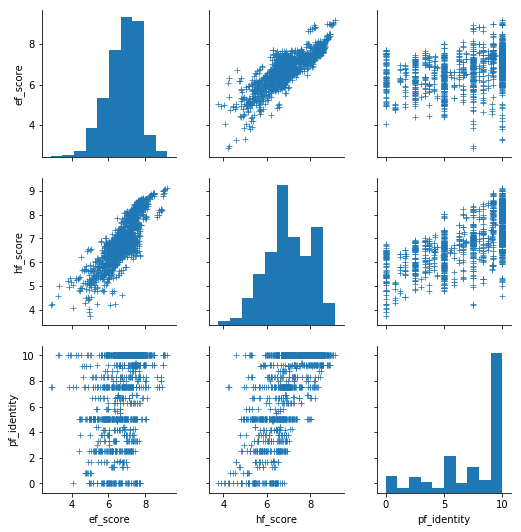

In [21]:
#Graficamos en pairplot pf_score, hf_score y pf_identity de forma automática, se nos resalta en la línea central las medias.

#Seleccionamos las columnas a utilizar
colu =['ef_score','hf_score','pf_identity']

#Eliminamos los NaN's 
dataset0 = dataset[colu].dropna()

plt.figure(figsize=(10,6))


seaborn.pairplot(data=dataset0[colu], vars=colu, markers='+') 

#plt.title("Gráfica temporal de la media de 'hf_score' y de 'ef_escore' ")
#plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=.8)

seaborn.despine()
plt.show()

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

Podemos observar que al "cruzar" **hf_score** con **ef_score** se nos presenta una representación uniforme, contrariamente los "cruces" con **pf_identity** nos genera una dispersión total de los valores. 

Esto se debe a que las distribuciones de **hf_score** con **ef_score** son "normales" y mantienen cierta uniformidad (Se observa en los graficos de barra del centro). Mientras que **pf_identity** sigue una distribución diferente a las otras variables(visualmente 'exponencial').

2. A continuación vamos a graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score.

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

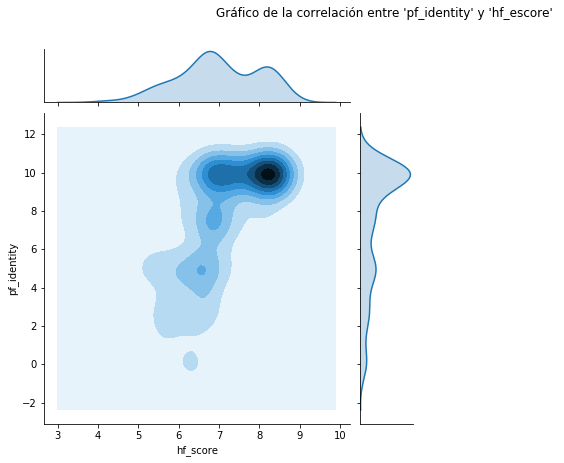

In [22]:
#Graficamos hf_score y pf_identity de forma automática, se nos resalta en la línea central las medias.

#Seleccionamos las columnas a utilizar
colu =['ef_score','hf_score','pf_identity']

#Eliminamos los NaN's 
dataset0 = dataset[colu].dropna()

plt.figure(figsize=(10,6))


#seaborn.heatmap(data=dataset0[colu], square=True, annot=True) 
plt.figure(figsize=(10,6))
seaborn.jointplot(data=dataset0[colu], x='hf_score', y='pf_identity', kind='kde')#kde

plt.title("Gráfico de la correlación entre 'pf_identity' y 'hf_escore' \n\n\n\n\n\n      ")
#plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=.8)

seaborn.despine()
plt.show()

<Figure size 720x432 with 0 Axes>

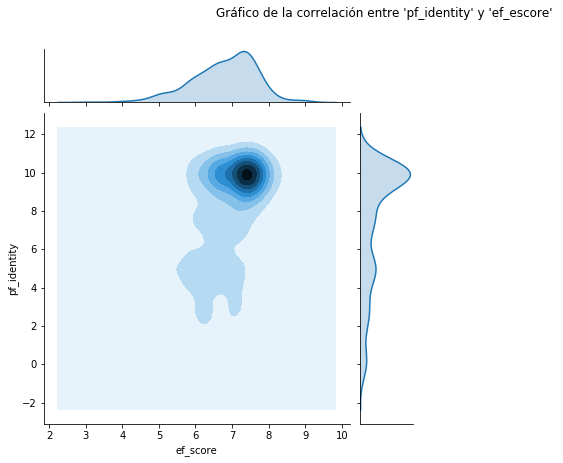

In [23]:
#Graficamos ef_score y pf_identity de forma automática, se nos resalta en la línea central las medias.

plt.figure(figsize=(10,6))
seaborn.jointplot(data=dataset0[colu], x='ef_score', y='pf_identity', kind='kde')#kde

plt.title("Gráfico de la correlación entre 'pf_identity' y 'ef_escore' \n\n\n\n\n\n      ")
#plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=.8)

seaborn.despine()
plt.show()

Podemos observar que las correlaciones entre las variables convergen en los altos valores. 
En el caso de pf_identity-hf_score observamos más dispersión, ya que como vimos anteriormente hf_Score está compuesta por 2 grandes distribuciones.

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.

A continuación analizamos correlaciones.

In [24]:
#Obtenemos la covarianza entre los pares de variables.
cov_data1 = dataset0.cov()["pf_identity"]["ef_score"]
print ("Covarianza (pf_identity,ef_score)=",cov_data1)
cov_data2 = dataset0.cov()["pf_identity"]["hf_score"]
print ("\nCovarianza (pf_identity,hf_score)=",cov_data2)

Covarianza (pf_identity,ef_score)= 1.0856334099430551

Covarianza (pf_identity,hf_score)= 2.1966164733462246


La covarianza positiva indica que en caso de correlación, el sentido de ésta sería de relación directa.

Para saber si existe correlación, utilizaremos el **"Coeficiente de correlación de Spearman"**, ya que es el que mejor se ajusta a las características de ambas variable **(son numéricas, cuantitativas, ordinales, distribución "incierta")**

In [25]:
dataset0[['pf_identity','hf_score','ef_score']].corr(method ='spearman')

,pf_identity,hf_score,ef_score
pf_identity,1.000000,0.686109,0.426993
hf_score,0.686109,1.000000,0.860647
ef_score,0.426993,0.860647,1.000000


Observamos que la correlación es positiva, y respecto a **pf_identity** es mayor con **hf_score**.